# Data fitting and regression

Let us imagine we measure the thickness of a book for different number of pages. We count the number of pages (variable book pages) and use a Vernier to measure the thickness in units of $mm$.

Then, we save the experimental data into a file named: "books.dat"


In [1]:
# Import usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data input using Pandas

We need to inspect the data.

In [2]:
# We use Pandas.DF

df = pd.read_csv("./sample_data/books.dat", sep = "\s+")

#print(df)

# Get data into arrays
pages = np.array(df["Pages"]) # in units of pages
thick = np.array(df["Thickness"]) # in units of mm

#print(thick)

### 1. Plotting the data:

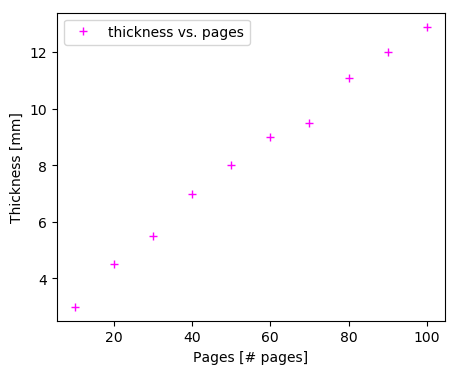

In [3]:
# Figure environment
plt.figure(figsize = (5,4))

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

### Spearman's coefficient

The Spearman correlation evaluates the monotonic relationship between 2 variables.

Linearity is not essential.

A monotonic relationship between 2 variables implies one of two situations:

- (Situation 1) As the value of one variable increases, so does the value of the other variable, OR,

- (Situation 2) As the value of one variable increases, the other variable value decreases.

Not necessarily at a constant rate.


### Pearson 'r' coefficient
The Pearson correlation coefficient (r) is an indicator of how strong a linear correlation between 2 variables is.

It can take values between -1 and 1.


To compute these coefficients, we need to import scipy

In [4]:
import scipy.stats as st

In [5]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(pages, thick)

# 2. Pearson coefficient
pe = st.pearsonr(pages, thick)

print("Spearman:\n", sp)

print("Pearson:\n", pe)


Spearman:
 SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)
Pearson:
 (0.9967647822032424, 4.774249416992817e-10)


### Linear regression

We usually need a model when we want to perform a regression. In this case, it is reasonable to use a line since we expect the number of pages and the tickness are linearly correlated.

Our model is then:

$thickness = m(pages) + b$


Note that $m$ and $b$ have units of $mm/page$ and $mm$, respectively.

### 1. Using np.polyfit()

np.polyfit() returns the coefficients $m$ and $b$.
See the documentation here:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [6]:
# Get coeffcients
m, b = np.polyfit(pages, thick, 1)

In [7]:
# Print to check
print('slope =', m, ' intercept=', b)

# Get fitting function
fit_thick = m*pages + b

slope = 0.10793939393939393  intercept= 2.31333333333333


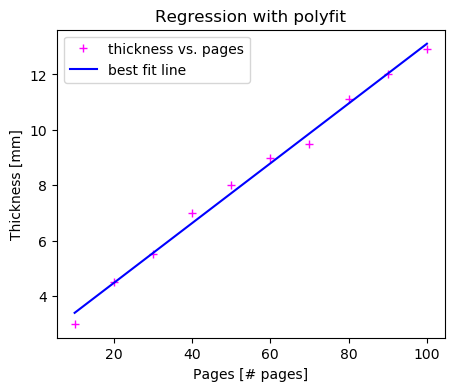

In [18]:
# replot  the data with the fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with polyfit")
plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick, color = "blue",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

### 2. Using Scipy functions
The function curve_fit() from the scipy.optimize package can be used.

See documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [9]:
# Import the scipy library
import scipy.optimize as opt

In [10]:
# Define the model function to fit the data

def fit_model(x_values, m, b):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope, b -> intercept with Y-axis
    Output: y_values (linear finction)
    """
    y_values = m * x_values + b
    
    return y_values


In [17]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(fit_model, pages, thick)

# Double check
#print(cova) # Covariance matrix
#print(coef) # The fitting parameters (optimal)
#print(type(coef)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

thickness = 0.10794 * pages + 2.31333


In [22]:
# Define the fitting data
#fit_thick2 = fit_model(pages, coef[0], coef[1])

# Another way to get the fit data
fit_thick2 = fit_model(pages, *coef)

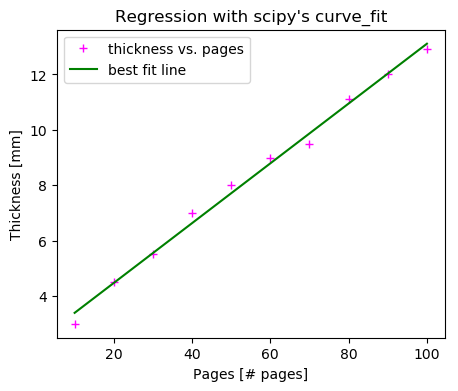

In [23]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

In [26]:
# Define the model function to fit the data

def fit_model2(x_values, m):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope, b -> intercept with Y-axis
    Output: y_values (linear finction)
    """
    y_values = m * x_values
    
    return y_values

In [27]:
# Call the curve_fit() function
coef2, cova2 = opt.curve_fit(fit_model2, pages, thick)

# Double check
#print(cova2) # Covariance matrix
#print(coef2) # The fitting parameters (optimal)
#print(type(coef2)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages' % (coef2[0]))

thickness = 0.14099 * pages


In [31]:
# Define the fitting data
#fit_thick2 = fit_model(pages, coef[0], coef[1])

# Another way to get the fit data
fit_thick3 = fit_model2(pages, *coef2)

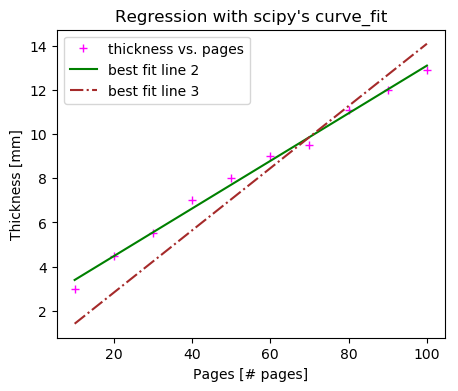

In [34]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = "best fit line 2")

plt.plot(pages, fit_thick3, color = "brown",\
        linestyle = "-.", label = "best fit line 3")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()